In [ ]:
import pandas as pd

In [ ]:
# Load the dataset
data = pd.read_csv("power_consumption.csv")

In [ ]:
print("Actual Data:")
print(data)

Actual Data:
      Unnamed: 0           States Regions   latitude  longitude       Dates  \
0              0           Punjab      NR  31.519974  75.980003  28/10/2019   
1              1          Haryana      NR  28.450006  77.019991  28/10/2019   
2              2        Rajasthan      NR  26.449999  74.639981  28/10/2019   
3              3            Delhi      NR  28.669993  77.230004  28/10/2019   
4              4            NR UP      NR  27.599981  78.050006  28/10/2019   
...          ...              ...     ...        ...        ...         ...   
7135        7135    NER Meghalaya     NER  25.570492  91.880014  23/05/2020   
7136        7136          Mizoram     NER  23.710399  92.720015  23/05/2020   
7137        7137         Nagaland     NER  25.666998  94.116570  23/05/2020   
7138        7138          Tripura     NER  23.835404  91.279999  23/05/2020   
7139        7139  ALL INDIA TOTAL     NaN        NaN        NaN  23/05/2020   

       Usage  
0       95.3  
1      1

In [ ]:
print("First ten rows in the dataset:")
print(data.head(10))

First ten rows in the dataset:
   Unnamed: 0        States Regions   latitude  longitude       Dates  Usage
0           0        Punjab      NR  31.519974  75.980003  28/10/2019   95.3
1           1       Haryana      NR  28.450006  77.019991  28/10/2019  105.7
2           2     Rajasthan      NR  26.449999  74.639981  28/10/2019  205.6
3           3         Delhi      NR  28.669993  77.230004  28/10/2019   59.2
4           4         NR UP      NR  27.599981  78.050006  28/10/2019  232.8
5           5   Uttarakhand      NR  30.320409  78.050006  28/10/2019   33.2
6           6            HP      NR  31.100025  77.166597  28/10/2019   24.6
7           7           J&K      NR  33.450000  76.240000  28/10/2019   42.6
8           8    Chandigarh      NR  30.719997  76.780006  28/10/2019    3.3
9           9  Chhattisgarh      WR  22.090420  82.159987  28/10/2019   85.1


In [ ]:
print("Dataset Information:")
data.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7140 entries, 0 to 7139
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  7140 non-null   int64  
 1   States      7140 non-null   object 
 2   Regions     6930 non-null   object 
 3   latitude    6930 non-null   float64
 4   longitude   6930 non-null   float64
 5   Dates       7140 non-null   object 
 6   Usage       7140 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 390.6+ KB


In [ ]:
#datatypes
data.dtypes

Unnamed: 0      int64
States         object
Regions        object
latitude      float64
longitude     float64
Dates          object
Usage         float64
dtype: object

In [ ]:
data.shape

(7140, 7)

Preprocessing

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Unnamed: 0      0
States          0
Regions       210
latitude      210
longitude     210
Dates           0
Usage           0
dtype: int64


In [ ]:
# Handle missing values
data.dropna(inplace=True)

In [ ]:
#remove duplicates
data=data.drop_duplicates()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Select columns to normalize (numeric columns)
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the selected columns
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6930 entries, 0 to 7138
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  6930 non-null   float64
 1   States      6930 non-null   object 
 2   Regions     6930 non-null   object 
 3   latitude    6930 non-null   float64
 4   longitude   6930 non-null   float64
 5   Dates       6930 non-null   object 
 6   Usage       6930 non-null   float64
dtypes: float64(4), object(3)
memory usage: 433.1+ KB


Feature Engineering

In [ ]:
#Convert 'Dates' column to datetime
data['Dates'] = pd.to_datetime(data['Dates'])

<ipython-input-14-403c2d50efd1>:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Dates'] = pd.to_datetime(data['Dates'])


In [ ]:
# Extract features from Dates column
data['day_of_week'] = data['Dates'].dt.dayofweek
data['month'] = data['Dates'].dt.month
data['year'] = data['Dates'].dt.year

      Unnamed: 0         States Regions  latitude  longitude      Dates  \
0        0.00000         Punjab      NR  0.921383   0.207937 2019-10-28   
1        0.00014        Haryana      NR  0.796331   0.253106 2019-10-28   
2        0.00028      Rajasthan      NR  0.714863   0.149737 2019-10-28   
3        0.00042          Delhi      NR  0.805292   0.262228 2019-10-28   
4        0.00056          NR UP      NR  0.761706   0.297843 2019-10-28   
...          ...            ...     ...       ...        ...        ...   
7134     0.99944        Manipur     NER  0.647651   0.988419 2020-05-23   
7135     0.99958  NER Meghalaya     NER  0.679038   0.898513 2020-05-23   
7136     0.99972        Mizoram     NER  0.603269   0.934997 2020-05-23   
7137     0.99986       Nagaland     NER  0.682969   0.995653 2020-05-23   
7138     1.00000        Tripura     NER  0.608361   0.872453 2020-05-23   

         Usage  day_of_week  month  year  
0     0.189541            0     10  2019  
1     0.21037

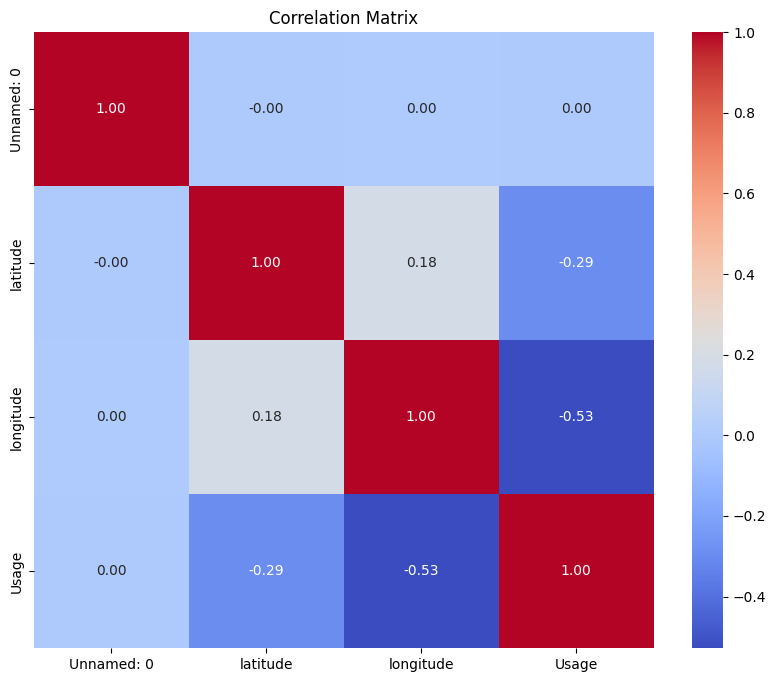

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
print(data)
# Remove non-numeric columns
data_corr = data.select_dtypes(include=['int64', 'float64'])
# Correlation analysis
correlation_matrix = data_corr.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


      Unnamed: 0         States Regions  latitude  longitude      Dates  \
0        0.00000         Punjab      NR  0.921383   0.207937 2019-10-28   
1        0.00014        Haryana      NR  0.796331   0.253106 2019-10-28   
2        0.00028      Rajasthan      NR  0.714863   0.149737 2019-10-28   
3        0.00042          Delhi      NR  0.805292   0.262228 2019-10-28   
4        0.00056          NR UP      NR  0.761706   0.297843 2019-10-28   
...          ...            ...     ...       ...        ...        ...   
7134     0.99944        Manipur     NER  0.647651   0.988419 2020-05-23   
7135     0.99958  NER Meghalaya     NER  0.679038   0.898513 2020-05-23   
7136     0.99972        Mizoram     NER  0.603269   0.934997 2020-05-23   
7137     0.99986       Nagaland     NER  0.682969   0.995653 2020-05-23   
7138     1.00000        Tripura     NER  0.608361   0.872453 2020-05-23   

         Usage  day_of_week  month  year  
0     0.189541            0     10  2019  
1     0.21037

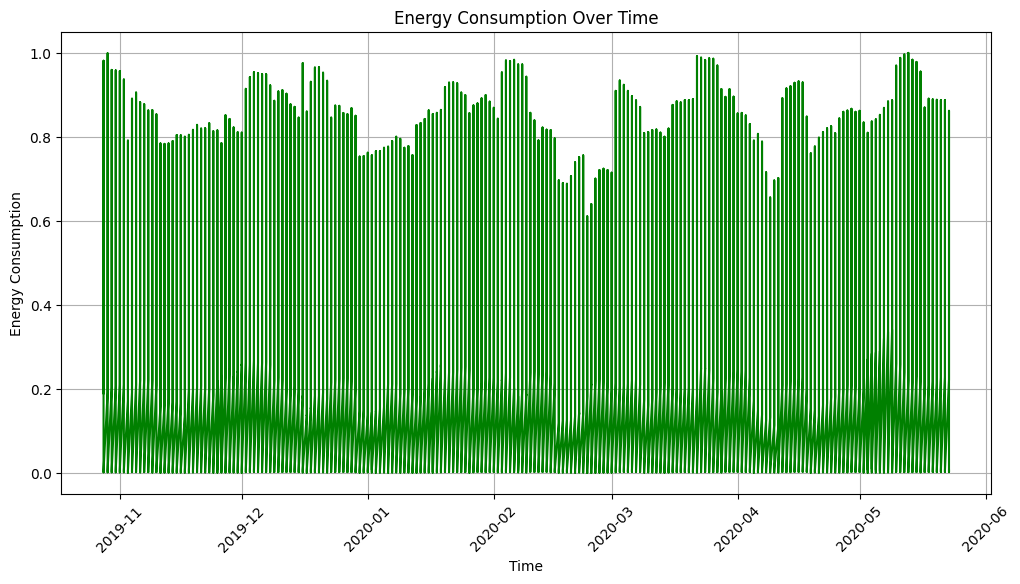

In [ ]:
# Plot energy consumption over time
plt.figure(figsize=(12, 6))
print(data)
plt.plot(data['Dates'], data['Usage'], color='green')
plt.title('Energy Consumption Over Time')
plt.xlabel('Time')
plt.ylabel('Energy Consumption')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Modelling

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
column=['year','month','Usage']
# Split the data into features and target variable
X = data[column]
y = data['Usage']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
print(y_pred)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

[0.00180325 0.56046484 0.00260469 ... 0.00320577 0.07953316 0.10603486]
Mean Squared Error: 5.222880686433923e-08


In [ ]:
# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
print(y_pred)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

[0.00180325 0.56046484 0.00260469 ... 0.00320577 0.07953316 0.10603486]
Mean Squared Error: 5.222880686433923e-08


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# Train the model
model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
print(y_pred)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

[0.00187547 0.55970375 0.00263855 ... 0.00323344 0.08154231 0.10955709]
Mean Squared Error: 2.4226503865752234e-06


In [ ]:
import xgboost as xgb

In [ ]:
# Train the model
model = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 8.545518536414455e-06


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have already trained your model and made predictions:
y_pred = model.predict(X_test)  # Replace 'model' with your actual model object

# Evaluate the model using regression metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 8.545518536414455e-06
R-squared: 0.999833699906433


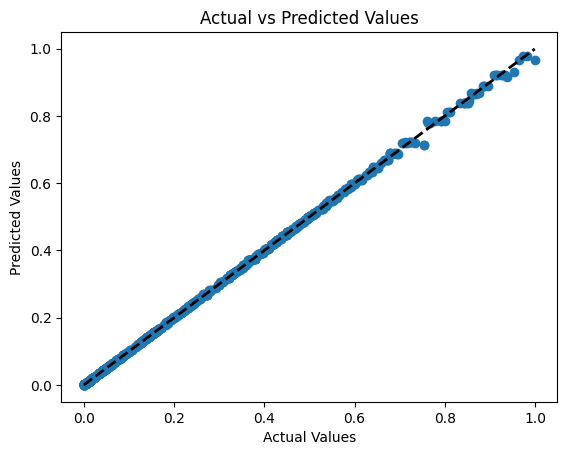

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot with actual values on the x-axis and predicted values on the y-axis
plt.scatter(y_test, y_pred)

# Add labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")

# Add a diagonal line to show perfect prediction
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "k--", lw=2)

# Show the plot
plt.show()

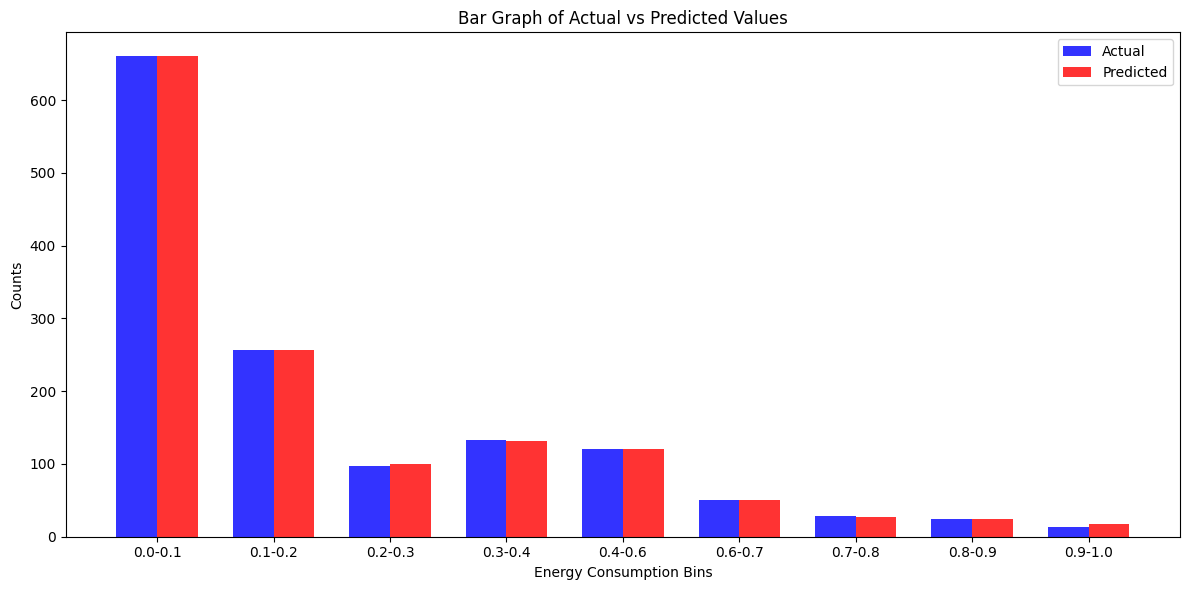

In [ ]:
# Create bins for the bar graph
bins = np.linspace(min(y_test), max(y_test), 10)
actual_counts, _ = np.histogram(y_test, bins)
predicted_counts, _ = np.histogram(y_pred, bins)

# Plotting the bar graph
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(bins) - 1)

plt.bar(index, actual_counts, bar_width, alpha=0.8, label='Actual', color='blue')
plt.bar(index + bar_width, predicted_counts, bar_width, alpha=0.8, label='Predicted', color='red')

plt.xlabel('Energy Consumption Bins')
plt.ylabel('Counts')
plt.title('Bar Graph of Actual vs Predicted Values')
plt.xticks(index + bar_width / 2, [f'{bins[i]:.1f}-{bins[i+1]:.1f}' for i in range(len(bins) - 1)])
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
data

,Unnamed: 0,States,Regions,latitude,longitude,Dates,Usage,day_of_week,month,year
0,0.00000,Punjab,NR,0.921383,0.207937,2019-10-28,0.189541,0,10,2019
1,0.00014,Haryana,NR,0.796331,0.253106,2019-10-28,0.210379,0,10,2019
2,0.00028,Rajasthan,NR,0.714863,0.149737,2019-10-28,0.410539,0,10,2019
3,0.00042,Delhi,NR,0.805292,0.262228,2019-10-28,0.117211,0,10,2019
4,0.00056,NR UP,NR,0.761706,0.297843,2019-10-28,0.465037,0,10,2019
...,...,...,...,...,...,...,...,...,...,...
7134,0.99944,Manipur,NER,0.647651,0.988419,2020-05-23,0.003606,5,5,2020
7135,0.99958,NER Meghalaya,NER,0.679038,0.898513,2020-05-23,0.010419,5,5,2020
7136,0.99972,Mizoram,NER,0.603269,0.934997,2020-05-23,0.002404,5,5,2020
7137,0.99986,Nagaland,NER,0.682969,0.995653,2020-05-23,0.002805,5,5,2020
